In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
old = pd.read_csv('evaluation_olddata_train-cleaned.csv', index_col=0)
old_rnn = pd.read_csv('evaluation_olddata_rnn.csv', index_col=0)
new = pd.read_csv('evaluation_newdata_train-cleaned.csv', index_col=0)
new_rnn = pd.read_csv('evaluation_newdata_rnn.csv', index_col=0)
mixed = pd.read_csv('evaluation_mixeddata_train-cleaned.csv', index_col=0)
mixed_rnn = pd.read_csv('evaluation_mixeddata_rnn.csv', index_col=0)

In [10]:
old["data"] = "old"
old["type"] = "cleaned"

old_rnn["data"] = "old"
old_rnn["type"] = "rnn"

new["data"] = "new"
new["type"] = "cleaned"

new_rnn["data"] = "new"
new_rnn["type"] = "rnn"

mixed["data"] = "mixed"
mixed["type"] = "cleaned"

mixed_rnn["data"] = "mixed"
mixed_rnn["type"] = "rnn"

In [11]:
evaluation = pd.concat([old,
                        old_rnn,
                        new,
                        new_rnn,
                        mixed,
                        mixed_rnn
                        ])

In [12]:
evaluation

,model,tuning,vec_variant,train_acc,train_prec,train_rec,train_f1,test_acc,test_prec,test_rec,test_f1,data,type
0,RandomForest,untuned,w2v,1.000000,1.000000,1.000000,1.000000,0.951437,0.778626,0.277929,0.409639,old,cleaned
1,RandomForest,randsearch,w2v,0.946262,0.823344,0.270747,0.407494,0.948133,0.734513,0.226158,0.345833,old,cleaned
2,RandomForest,optuna,w2v,1.000000,1.000000,1.000000,1.000000,0.951933,0.779412,0.288828,0.421471,old,cleaned
3,BalancedRandomForest,untuned,w2v,0.870858,0.345768,1.000000,0.513859,0.853650,0.270557,0.833787,0.408545,old,cleaned
4,XGBoost,untuned,w2v,1.000000,1.000000,1.000000,1.000000,0.951602,0.677885,0.384196,0.490435,old,cleaned
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,XGBoost,optuna,glove,0.903281,0.863699,0.542152,0.666154,0.821263,0.520174,0.262939,0.349308,mixed,rnn
32,CatBoostClassifier,untuned,glove,0.831530,0.673113,0.103960,0.180103,0.825024,0.635704,0.096053,0.166889,mixed,rnn
33,LightGBM,untuned,glove,0.856481,0.802711,0.256768,0.389079,0.832306,0.646081,0.178947,0.280268,mixed,rnn
34,StackingClassifier-RF-SVC,untuned,glove,0.983880,0.982418,0.926004,0.953378,0.825424,0.574791,0.166009,0.257614,mixed,rnn


In [13]:
evaluation.sort_values(by=["test_prec"], ascending=False)

,model,tuning,vec_variant,train_acc,train_prec,train_rec,train_f1,test_acc,test_prec,test_rec,test_f1,data,type
14,RandomForest,optuna,tf,0.942751,1.000000,0.122030,0.217517,0.935108,1.000000,0.043584,0.083527,old,rnn
14,RandomForest,optuna,tf,0.945554,1.000000,0.202282,0.336497,0.947473,1.000000,0.133515,0.235577,old,cleaned
14,RandomForest,optuna,tf,0.796894,1.000000,0.046717,0.089264,0.789399,0.916667,0.013644,0.026888,new,rnn
14,RandomForest,optuna,tf,0.839339,1.000000,0.108153,0.195194,0.826021,0.908046,0.035771,0.068830,mixed,cleaned
14,RandomForest,optuna,tf,0.825699,1.000000,0.020715,0.040589,0.818222,0.904762,0.004167,0.008295,mixed,rnn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,BalancedRandomForest,untuned,glove,0.883390,0.369207,1.000000,0.539301,0.848365,0.266723,0.858311,0.406977,old,cleaned
27,BalancedRandomForest,untuned,glove,0.869868,0.333814,1.000000,0.500541,0.830294,0.264795,0.845036,0.403235,old,rnn
15,BalancedRandomForest,untuned,tf,0.875319,0.353761,1.000000,0.522635,0.842088,0.255602,0.839237,0.391858,old,cleaned
3,BalancedRandomForest,untuned,w2v,0.823041,0.269264,1.000000,0.424284,0.814687,0.240754,0.803874,0.370536,old,rnn


In [14]:
evaluation.sort_values(by=["test_rec"], ascending=False)

,model,tuning,vec_variant,train_acc,train_prec,train_rec,train_f1,test_acc,test_prec,test_rec,test_f1,data,type
27,BalancedRandomForest,untuned,glove,0.883390,0.369207,1.000000,0.539301,0.848365,0.266723,0.858311,0.406977,old,cleaned
27,BalancedRandomForest,untuned,glove,0.869868,0.333814,1.000000,0.500541,0.830294,0.264795,0.845036,0.403235,old,rnn
15,BalancedRandomForest,untuned,tf,0.875319,0.353761,1.000000,0.522635,0.842088,0.255602,0.839237,0.391858,old,cleaned
3,BalancedRandomForest,untuned,w2v,0.870858,0.345768,1.000000,0.513859,0.853650,0.270557,0.833787,0.408545,old,cleaned
15,BalancedRandomForest,untuned,tf,0.842758,0.293131,1.000000,0.453366,0.811401,0.239915,0.820823,0.371303,old,rnn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,RandomForest,optuna,tf,0.796894,1.000000,0.046717,0.089264,0.789399,0.916667,0.013644,0.026888,new,rnn
25,RandomForest,randsearch,glove,0.820641,0.771084,0.006197,0.012295,0.820853,0.714286,0.005660,0.011231,mixed,cleaned
14,RandomForest,optuna,tf,0.825699,1.000000,0.020715,0.040589,0.818222,0.904762,0.004167,0.008295,mixed,rnn
25,RandomForest,randsearch,glove,0.822252,0.818182,0.001734,0.003461,0.818102,0.850000,0.003728,0.007424,mixed,rnn


In [15]:
evaluation.sort_values(by=["test_f1"], ascending=False)

,model,tuning,vec_variant,train_acc,train_prec,train_rec,train_f1,test_acc,test_prec,test_rec,test_f1,data,type
22,StackingClassifier-RF-SVC,untuned,tf,0.999504,0.996885,0.995851,0.996367,0.960522,0.717687,0.574932,0.638427,old,cleaned
22,StackingClassifier-RF-SVC,untuned,tf,0.999789,0.996771,1.000000,0.998383,0.954657,0.740351,0.510896,0.604585,old,rnn
23,SVC,untuned,tf,0.995044,0.996667,0.930498,0.962446,0.958209,0.735537,0.485014,0.584565,old,cleaned
23,SVC,untuned,tf,0.996338,0.996591,0.947084,0.971207,0.955150,0.821101,0.433414,0.567353,old,rnn
12,RandomForest,untuned,tf,1.000000,1.000000,1.000000,1.000000,0.959696,0.855491,0.403270,0.548148,old,cleaned
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,RandomForest,optuna,tf,0.796894,1.000000,0.046717,0.089264,0.789399,0.916667,0.013644,0.026888,new,rnn
25,RandomForest,randsearch,glove,0.820641,0.771084,0.006197,0.012295,0.820853,0.714286,0.005660,0.011231,mixed,cleaned
14,RandomForest,optuna,tf,0.825699,1.000000,0.020715,0.040589,0.818222,0.904762,0.004167,0.008295,mixed,rnn
25,RandomForest,randsearch,glove,0.822252,0.818182,0.001734,0.003461,0.818102,0.850000,0.003728,0.007424,mixed,rnn


In [21]:
evaluation[evaluation.data == "mixed"].sort_values(by=["test_f1"], ascending=False)

,model,tuning,vec_variant,train_acc,train_prec,train_rec,train_f1,test_acc,test_prec,test_rec,test_f1,data,type
15,BalancedRandomForest,untuned,tf,0.860165,0.562994,0.999903,0.720379,0.757285,0.405613,0.752547,0.527117,mixed,cleaned
15,BalancedRandomForest,untuned,tf,0.882959,0.603290,1.000000,0.752565,0.733755,0.384233,0.762061,0.510879,mixed,rnn
3,BalancedRandomForest,untuned,w2v,0.875445,0.591219,1.000000,0.743102,0.719844,0.365851,0.761603,0.494270,mixed,cleaned
27,BalancedRandomForest,untuned,glove,0.876090,0.592495,0.999806,0.744055,0.715815,0.358545,0.736246,0.482242,mixed,cleaned
27,BalancedRandomForest,untuned,glove,0.873167,0.583957,0.999518,0.737209,0.708387,0.354398,0.728070,0.476738,mixed,rnn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,RandomForest,optuna,tf,0.839339,1.000000,0.108153,0.195194,0.826021,0.908046,0.035771,0.068830,mixed,cleaned
25,RandomForest,randsearch,glove,0.820641,0.771084,0.006197,0.012295,0.820853,0.714286,0.005660,0.011231,mixed,cleaned
14,RandomForest,optuna,tf,0.825699,1.000000,0.020715,0.040589,0.818222,0.904762,0.004167,0.008295,mixed,rnn
25,RandomForest,randsearch,glove,0.822252,0.818182,0.001734,0.003461,0.818102,0.850000,0.003728,0.007424,mixed,rnn


#### Auswertung

#### Visualisierung F1-Score

<Axes: xlabel='model', ylabel='test_f1'>

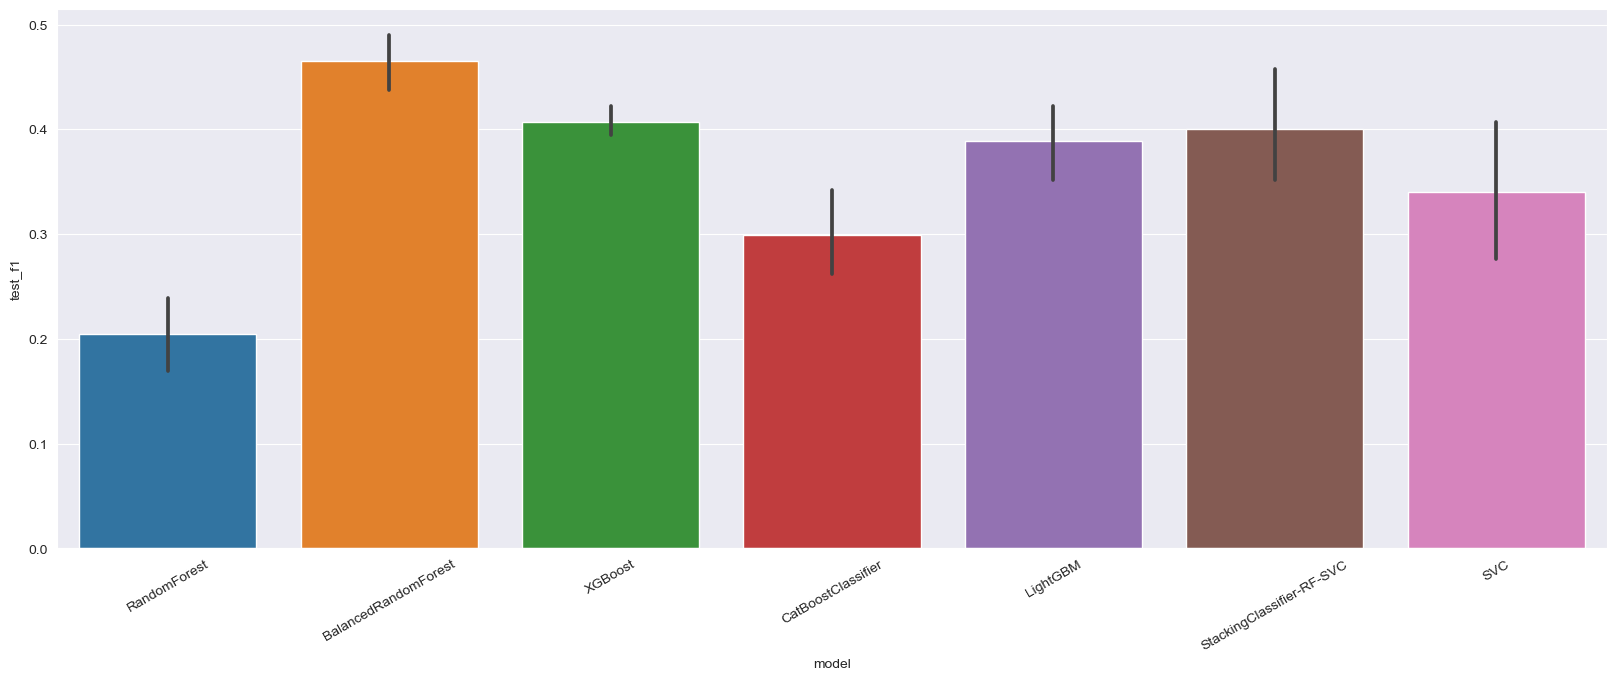

In [16]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation=30)
sns.barplot(data=evaluation, y=evaluation.test_f1, x=evaluation.model, label="Test F1-Score")

#### Unterschiede/Schwankungen zw. Train <-> Test F1-Scores

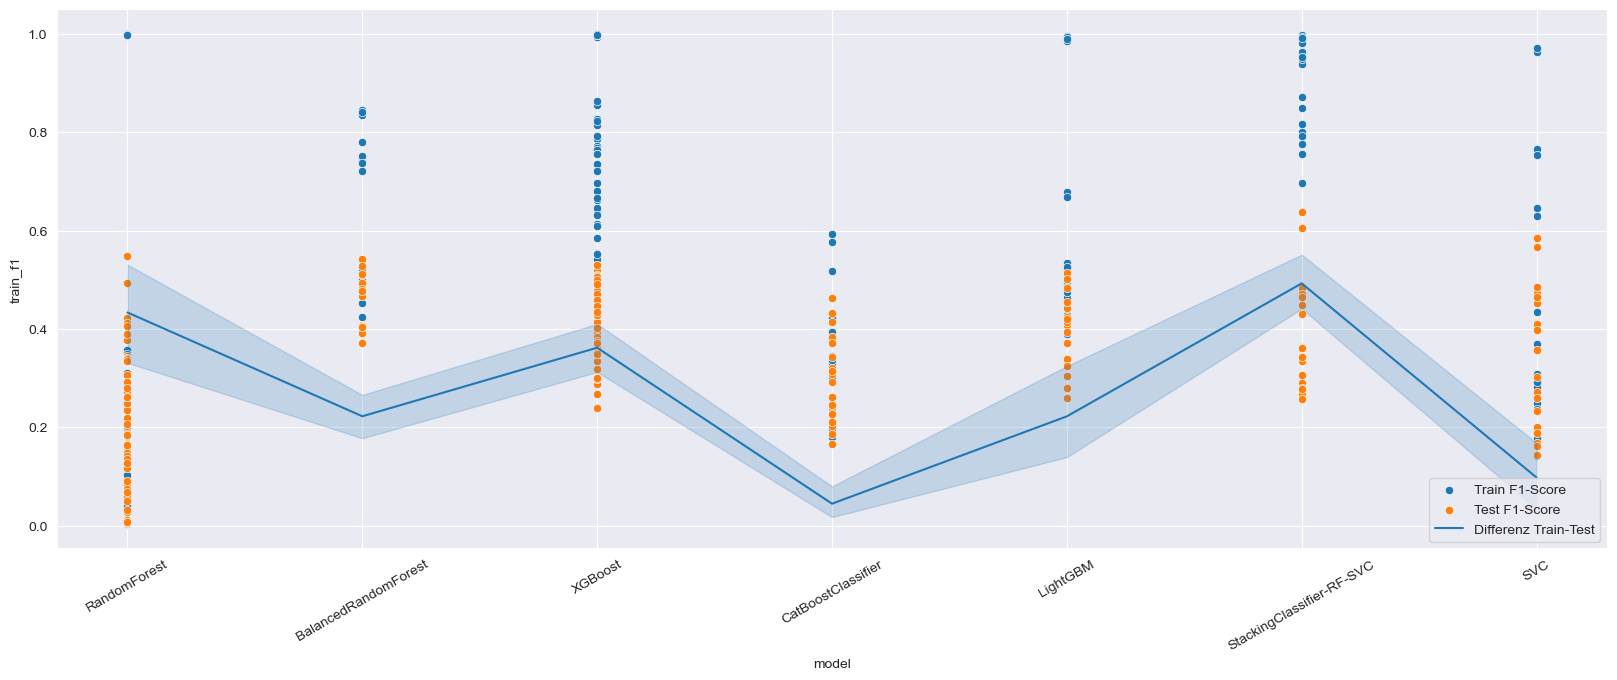

In [17]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation=30)

diff = evaluation['train_f1'] - evaluation['test_f1']
sns.scatterplot(data=evaluation, y=evaluation['train_f1'], x=evaluation.model, ax=ax, label="Train F1-Score")
sns.scatterplot(data=evaluation, y=evaluation['test_f1'], x=evaluation.model, ax=ax, label="Test F1-Score")
sns.lineplot(data=evaluation, y=diff, x=evaluation.model, label="Differenz Train-Test")

plt.show()

#### Vergleich Accuracy - F1-Score

<Axes: xlabel='model', ylabel='test_f1'>

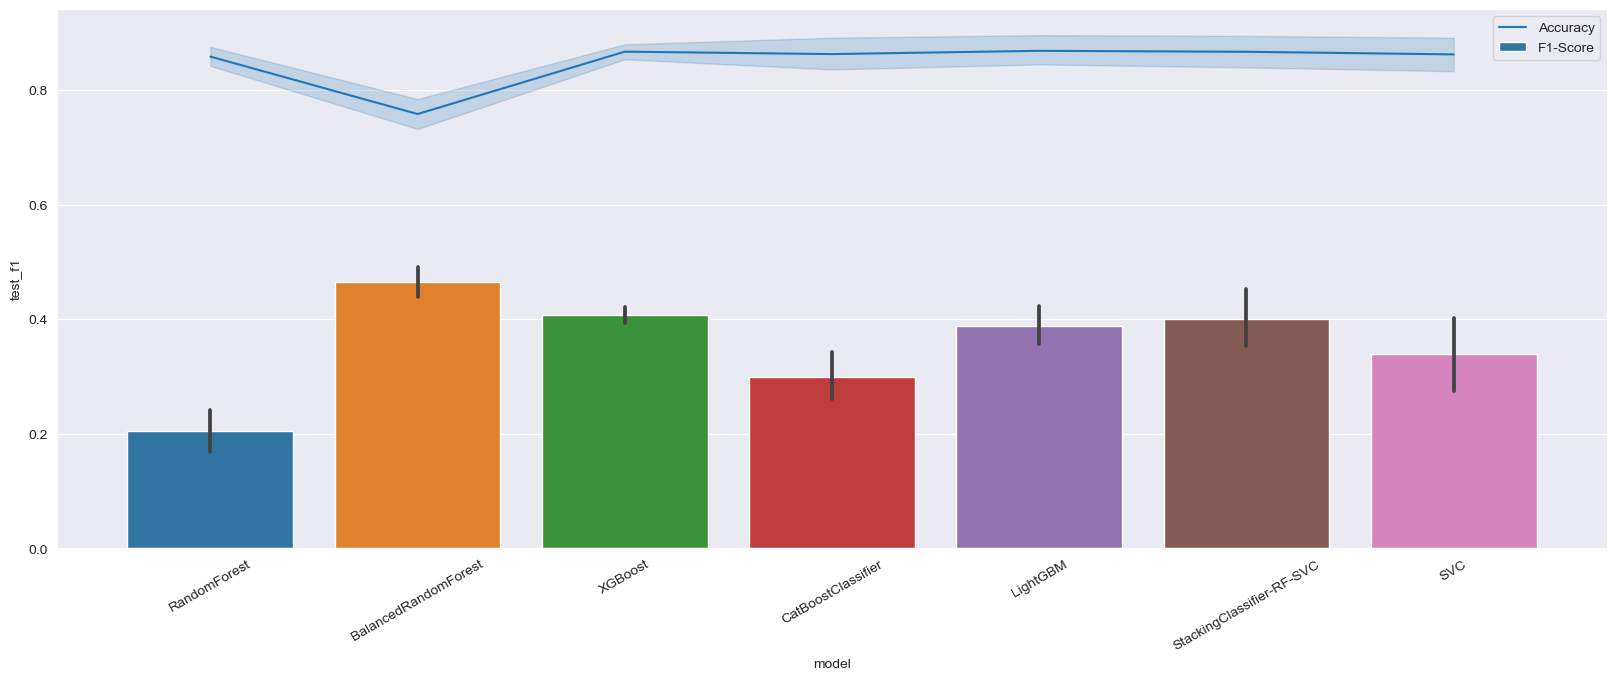

In [18]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation=30)
sns.barplot(data=evaluation, y=evaluation.test_f1, x=evaluation.model, label="F1-Score")
sns.lineplot(data=evaluation, y=evaluation.test_acc, x=evaluation.model, label="Accuracy")

#### Vergleich Precision - Recall

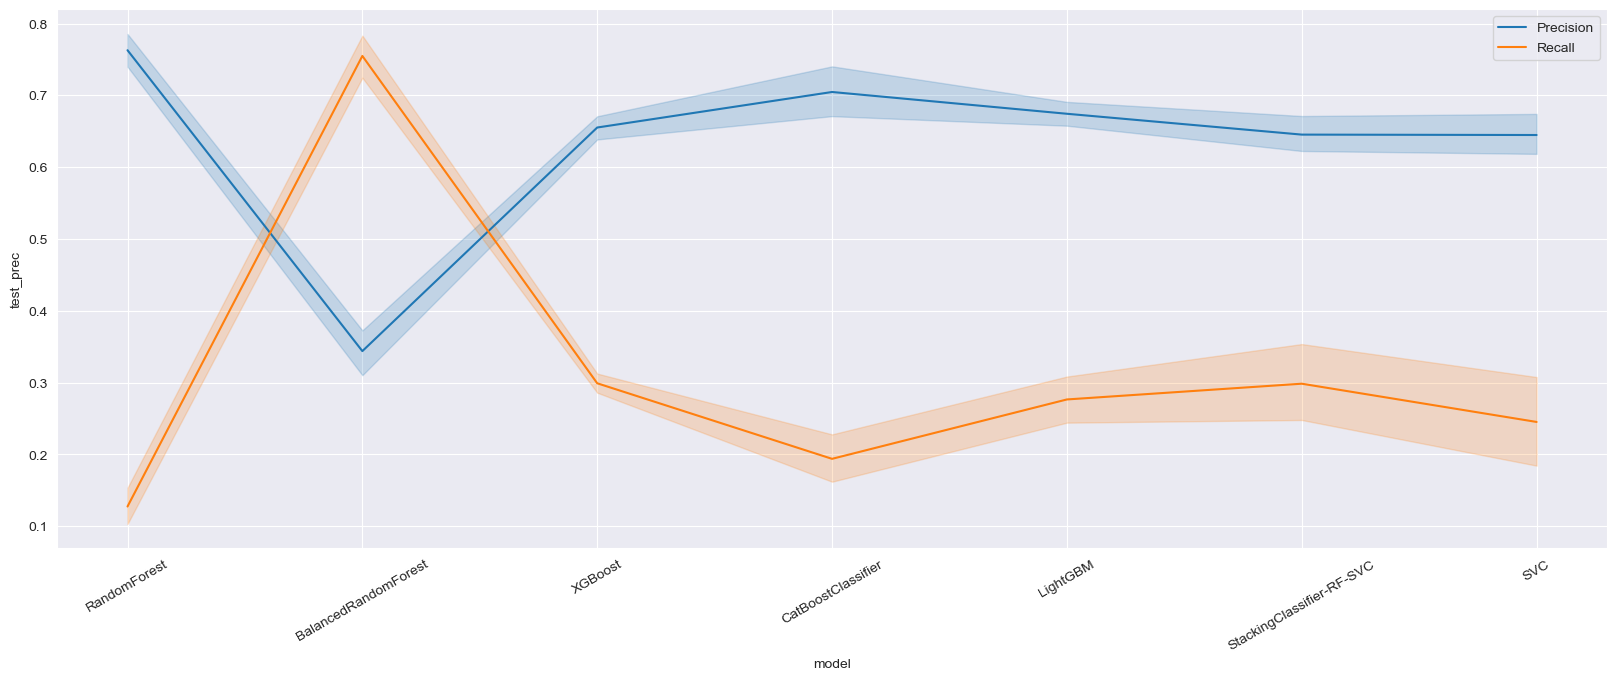

In [19]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation=30)
a = sns.lineplot(data=evaluation, y=evaluation.test_prec, x=evaluation.model, label="Precision")
b = sns.lineplot(data=evaluation, y=evaluation.test_rec, x=evaluation.model, label="Recall")

#### Unterschiede zum Basismodell pred=0

Train
- Positive:
- Negative:
- Verhältnis:
- Genauigkeit pred=0:
Test
- Positive:
- Negative:
- Verhältnis:
- Genauigkeit pred=0:


<Axes: xlabel='model', ylabel='test_acc'>

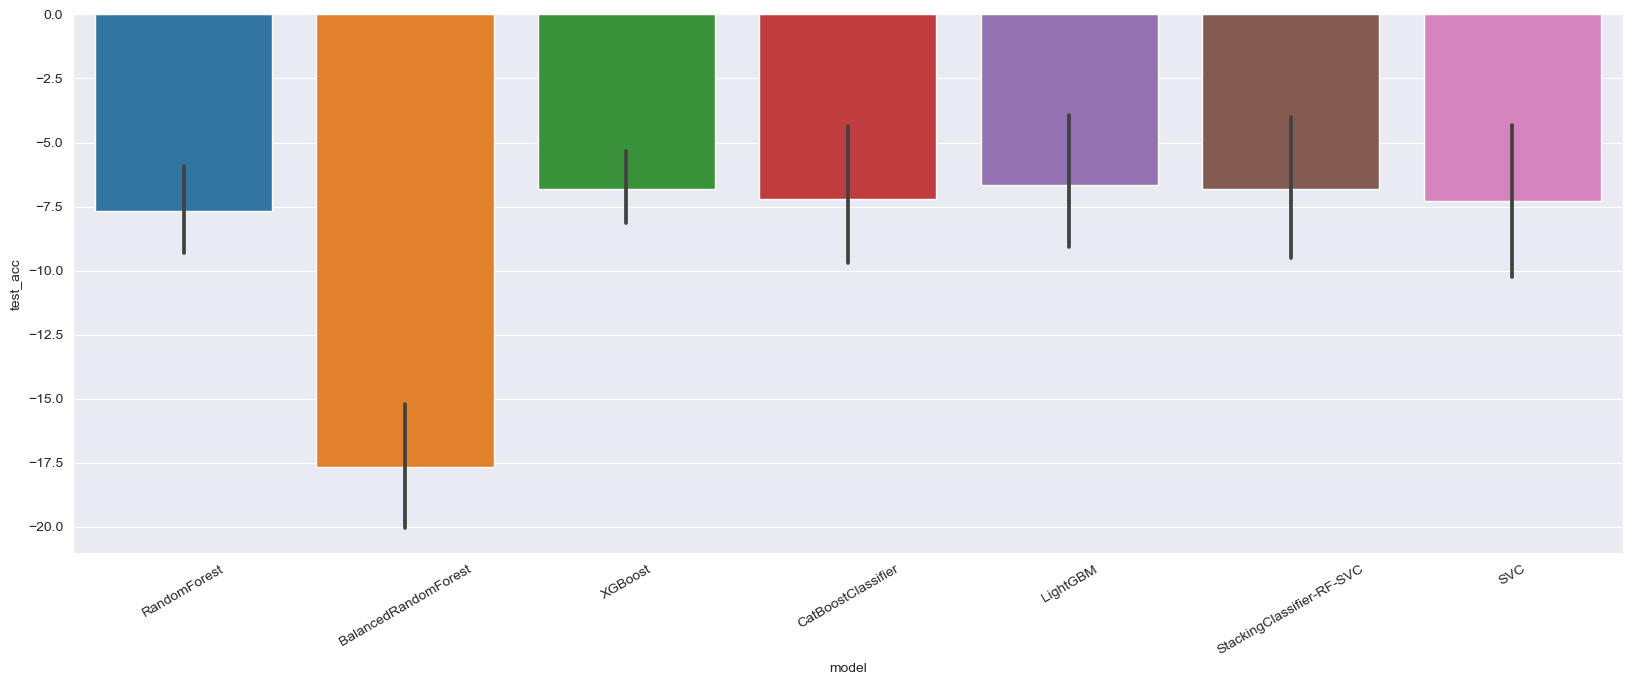

In [20]:
acc = (evaluation["test_acc"] - 0.93478) * 100

fig, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation=30)
sns.barplot(data=evaluation, y=acc, x=evaluation.model)